In [186]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

t, r, k, a1, a2, m12,  = symbols("t, r, k, a1, a2, m12")
x = Function("x")
y = Function("y")

#Differential Equation 01, including:
# r = positive growth rate
# k1, k2 = Carrying Capacity
# a1 = percentage decrease due to human induced Allee Effects in patch 1
# a2 = percentage decrease due to environmental Allee Effects in patch 2
# m12 = Migration from Patch 1 to 2
Patch_1 = Eq(diff(x(t), t), r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)))

Patch_2 = Eq(diff(y(t), t), r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) + (m12 * x(t)))


solution= dsolve([Patch_1, Patch_2], [x(t), y(t)])
display(solution)


[Eq(x(t), Piecewise((C1*Piecewise((-m12/2 + sqrt(m12**2)/2, Eq(m12 + r, m12/2 + r - sqrt(m12**2)/2)), (0, True))*exp(t*(-m12/2 - r + sqrt(m12**2)/2)) + C2*Piecewise((-m12/2 - sqrt(m12**2)/2, Eq(m12 + r, m12/2 + r + sqrt(m12**2)/2)), (0, True))*exp(t*(-m12/2 - r - sqrt(m12**2)/2)), Ne(m12**2, 0)), (C1*exp(t*(-m12/2 - r + sqrt(m12**2)/2)), Eq(m12, 0) & Eq(r, m12 + r)), ((C1*Piecewise((-m12/2 + sqrt(m12**2)/2, Eq(m12 + r, m12/2 + r - sqrt(m12**2)/2)), (0, True)) + C2*(t*Piecewise((-m12/2 + sqrt(m12**2)/2, Eq(m12 + r, m12/2 + r - sqrt(m12**2)/2)), (0, True)) + Piecewise((1, Eq(m12 + r, m12/2 + r - sqrt(m12**2)/2)), (0, True))))*exp(t*(-m12/2 - r + sqrt(m12**2)/2)), True))),
 Eq(y(t), Piecewise((C1*Piecewise((m12, Eq(m12 + r, m12/2 + r - sqrt(m12**2)/2)), (m12/2 + sqrt(m12**2)/2, True))*exp(t*(-m12/2 - r + sqrt(m12**2)/2)) + C2*Piecewise((m12, Eq(m12 + r, m12/2 + r + sqrt(m12**2)/2)), (m12/2 - sqrt(m12**2)/2, True))*exp(t*(-m12/2 - r - sqrt(m12**2)/2)), Ne(m12**2, 0)), (C2*exp(t*(-m12/2 - r

In [187]:
#Two Patch Coupled System of ODEs
DS1 = -r * ((x(t)/a1) - 1) * (1 - (x(t)/k)) * x(t) - m12 * x(t) 
DS2 = -r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) + m12 * x(t) 

#Finding the Equilibrium Values
Equilibrium= nonlinsolve([DS1,DS2], [x(t), y(t)])
display(Equilibrium)

eq_list = list(Equilibrium)
print(eq_list)

FiniteSet((0, 0), (0, a2), (0, k))

[(0, 0), (0, a2), (0, k)]


In [188]:
#Finding the Jacobian 
Jacobian = Matrix(
    [
    [diff(DS1, x(t)), diff(DS1, y(t))], 
    [diff(DS2, x(t)), diff(DS2, y(t))]
    ])
Jacobian


Matrix([
[-m12 - r*(-1 + x(t)/a1)*(1 - x(t)/k) + r*(-1 + x(t)/a1)*x(t)/k - r*(1 - x(t)/k)*x(t)/a1,                                                                                 0],
[                                                                                    m12, -r*(-1 + y(t)/a2)*(1 - y(t)/k) + r*(-1 + y(t)/a2)*y(t)/k - r*(1 - y(t)/k)*y(t)/a2]])

In [108]:
#Jacobian matrix with (0,0) substituted in
Jac_1 = simplify(Jacobian.subs({x(t) : eq_list[0][0], y(t) : eq_list[0][1]}))
Jac_1

Matrix([
[-m12 - r,  0],
[     m12, -r]])

In [109]:
#Caculating the Jacobian for each of the equilibrium values. 
for i in eq_list: 
    Jac = simplify(Jacobian.subs({x(t) : i[0], y(t) : i[1]}))
    display(Jac)
    

Matrix([
[-m12 - r,  0],
[     m12, -r]])

Matrix([
[-m12 - r,           0],
[     m12, -a2*r/k + r]])

Matrix([
[-m12 - r,             0],
[     m12, r*(a2 - k)/a2]])

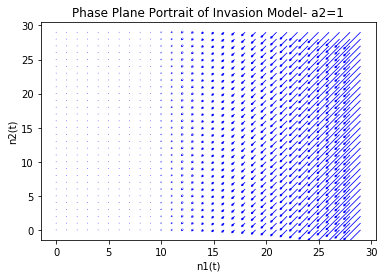

In [113]:
#Creating the Phase Plane Plots,

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np
nx, ny = 1, 1  #increments
x = np.arange(0, 30, nx) #domain
y = np.arange(0, 30, ny) #range
X, Y = np.meshgrid(x, y)

#Example Values for Phase Plane Plots

r=1
a1=1
a2=1
k=1
m12=0.3

dx = r * ((x/a1) - 1) * ((1 - (x/k)) * x) - (m12 * x)
dy = r * ((y/a2) - 1) * ((1 - (y/k)) * y) + (m12 * x) 


plot1 = plt.figure()
plt.quiver(X, Y, dx, dy, color='blue', headlength=2)


plt.title('Phase Plane Portrait of Invasion Model- a2=1')
plt.ylabel('n2(t)')
plt.xlabel('n1(t)')
plt.show(plot1, plot2)


Text(0, 0.5, 'N2(t)')

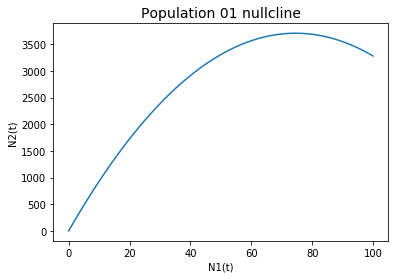

In [184]:
# Nullclines
#Nullclines are when there is no change in the system over time. 
# Intersections of nullclines can show you the fixed points/stability of your system

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import numpy as np


r = int(input('Growth Factor [new individuals/Day] (must be positive)?'))
a1 = int(input('Measure of Allee Effect in the first population, (a1<k)?'))
a2 = int(input('Measure of Allee Effect in the second population (a2<k)?'))
k = int(input('Carrying Capacity (k> a1,a2)?'))
m12 = float(input('Migration rate from Patch 1 to Patch 2 (proportion))?'))

def f1(x):
    return -r * ((x/a1) - 1) * ((1 - (x/k)) * x) - (m12 * x)

x1 = np.linspace(0, 100, 100)
y1 = f1(x)

fig, ax = plt.subplots()
ax.plot(x1, y1, label='Function')
ax.set_title('Population 01 nullcline', size=14)
plt.xlabel("N1(t)")
plt.ylabel("N2(t)")
